In [68]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys/')
from tools import envelope_analysis as ea
from tools import plotting as myplt

In [69]:
plot.rc['grid.alpha'] = 0.04
plot.rc['figure.facecolor'] = 'white'

In [70]:
def save(figname):
    plt.savefig(''.join(['_output/figures/', figname, '.png']), facecolor='white', dpi=250)

In [122]:
emittances_list = np.load('_output/data/emittances_list.npy')
moments_list = np.load('_output/data/moments_list.npy')
moments_list *= 1e6
transfer_mats_list = np.load('_output/data/transfer_mats_list.npy')
intensities = np.load('_output/data/intensities.npy')
intensities /= 1e14

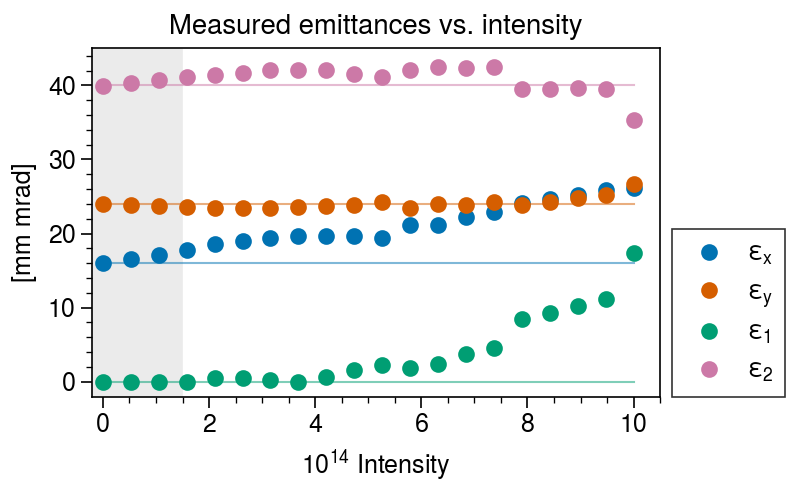

In [153]:
fig, ax = plot.subplots(figsize=(4, 2.5))

x = np.linspace(-10, 20, 10000)
ax.fill_between(x, 0, 1, where=x < 1.5, color='k', 
                alpha=0.08, transform=ax.get_xaxis_transform())

m = 'o'
alpha = 1.0
s = 5
ax.plot(intensities, emittances_list[:, 2:], marker=m, ms=s, alpha=alpha, lw=0);
ax.plot(intensities, emittances_list[:, :2], marker=m, ms=s, alpha=alpha, lw=0);
ax.format(cycle='colorblind')
for emittance in [16.0, 24.0, 0.0, 40.0]:
    ax.plot(intensities, len(intensities) * [emittance], alpha=0.5, lw=0.75)
ax.format(xlabel=r'$10^{14}$ Intensity', ylabel=r'[mm mrad]', xlim=(-0.2, 10.5), ylim=(-2, 45), grid=False)
ax.legend(labels=[r'$\varepsilon_x$', r'$\varepsilon_y$', r'$\varepsilon_1$', r'$\varepsilon_2$'],
          loc=(1.02, 0), ncols=1);
ax.format(title='Measured emittances vs. intensity')
save('emittance_vs_intensity')

## 